In [6]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import matplotlib.font_manager as font_manager
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
font_prop = font_manager.FontProperties(size=18)
plt.rcParams["font.family"] = "Times"
%matplotlib inline

survey_designs = glob.glob("./FINALDESIGNS/survey/*")
survey_designs

['./FINALDESIGNS/survey/zeta-0_104669_0_1391.fits',
 './FINALDESIGNS/survey/zeta-0_104667_0_1391.fits',
 './FINALDESIGNS/survey/zeta-0_104668_0_1391.fits']

In [7]:
# #the zeta-0 RS file for COSMOS
# file = "./RM_surveyMAX.fits"
# data2 = Table.read(file, hdu = 2, format='fits')
# data1 = Table.read(file, hdu = 1, format='fits')

# #make array of what non-knownspec targets were used

# assigned_other = ((data2['assigned'] == 1) & (data1['category'] == 'science') & (data1['carton'] != 'bhm_rm_known_spec'))
# assigned_SCIENCEfibers = ((data2['assigned'] == 1) & (data1['category'] == 'science'))
# assigned_CALIBfibers = ((data2['assigned'] == 1) & ((data1['category'] == 'sky_boss') | (data1['category'] == 'standard_boss')))


# assigned_known = ((data2['assigned'] == 1) & (data1['carton'] == 'bhm_rm_known_spec'))
# assigned_core = ((data2['assigned'] == 1) & (data1['carton'] == 'bhm_rm_core'))
# assigned_var = ((data2['assigned'] == 1) & (data1['carton'] == 'bhm_rm_var'))
# assigned_ancil = ((data2['assigned'] == 1) & (data1['carton'] == 'bhm_rm_ancillary'))
# threshold_mask = ((data1['carton'][assigned_SCIENCEfibers] == 'bhm_rm_known_spec') | (data1["priority"][assigned_SCIENCEfibers] <= 950.))

# print("------- {} Survey Design --------".format(file.split("_")[0]))
# print("calib: ", len(data1[assigned_CALIBfibers]))
# print("science: ", len(data1[assigned_SCIENCEfibers]))
# print("total assignments: {}/500".format(len(data1[assigned_CALIBfibers]) + len(data1[assigned_SCIENCEfibers])))


# assert len(data1[assigned_other]) == (len(data1[assigned_SCIENCEfibers]) - len(data1[assigned_known])), "not equal!"
# print("")
# print("science breakdown")
# # print("known spec: ", len(data1[assigned_known]))
# # print("other (var+core+ancil): ",len(data1[assigned_other]))
# # print("var: ", len(data1[assigned_var]))
# # print("core: ", len(data1[assigned_core]))
# # print("ancil: ", len(data1[assigned_ancil]))
# print("known QSOs: ", len(data1['priority'][assigned_SCIENCEfibers][threshold_mask]))
# print("candidate QSOs: ", len(data1['priority'][assigned_SCIENCEfibers][~threshold_mask]))

In [8]:
for file in survey_designs:

    data2 = Table.read(file, hdu = 2, format='fits')
    data1 = Table.read(file, hdu = 1, format='fits')

    #make array of what non-knownspec targets were used

    assigned_other = ((data2['assigned'] == 1) & (data1['category'] == 'science') & (data1['carton'] != 'bhm_rm_known_spec'))
    assigned_SCIENCEfibers = ((data2['assigned'] == 1) & (data1['category'] == 'science'))
    assigned_CALIBfibers = ((data2['assigned'] == 1) & ((data1['category'] == 'sky_boss') | (data1['category'] == 'standard_boss')))


    assigned_known = ((data2['assigned'] == 1) & (data1['carton'] == 'bhm_rm_known_spec'))
    assigned_core = ((data2['assigned'] == 1) & (data1['carton'] == 'bhm_rm_core'))
    assigned_var = ((data2['assigned'] == 1) & (data1['carton'] == 'bhm_rm_var'))
    assigned_ancil = ((data2['assigned'] == 1) & (data1['carton'] == 'bhm_rm_ancillary'))
    threshold_mask = ((data1['carton'][assigned_SCIENCEfibers] == 'bhm_rm_known_spec') | (data1["priority"][assigned_SCIENCEfibers] <= 950.))

    print("------- {} Survey Design --------".format(file.split("_")[1]))
    print("calib: ", len(data1[assigned_CALIBfibers]))
    print("science: ", len(data1[assigned_SCIENCEfibers]))
    print("total assignments: {}/500".format(len(data1[assigned_CALIBfibers]) + len(data1[assigned_SCIENCEfibers])))


    assert len(data1[assigned_other]) == (len(data1[assigned_SCIENCEfibers]) - len(data1[assigned_known])), "not equal!"
    print("")
    print("science breakdown")
    # print("known spec: ", len(data1[assigned_known]))
    # print("other (var+core+ancil): ",len(data1[assigned_other]))
    # print("var: ", len(data1[assigned_var]))
    # print("core: ", len(data1[assigned_core]))
    # print("ancil: ", len(data1[assigned_ancil]))
    print("known QSOs: ", len(data1['priority'][assigned_SCIENCEfibers][threshold_mask]))
    print("candidate QSOs: ", len(data1['priority'][assigned_SCIENCEfibers][~threshold_mask]))

------- 104669 Survey Design --------
calib:  120
science:  371
total assignments: 491/500

science breakdown
known QSOs:  364
candidate QSOs:  7
------- 104667 Survey Design --------
calib:  120
science:  378
total assignments: 498/500

science breakdown
known QSOs:  378
candidate QSOs:  0
------- 104668 Survey Design --------
calib:  120
science:  377
total assignments: 497/500

science breakdown
known QSOs:  341
candidate QSOs:  36


377
377


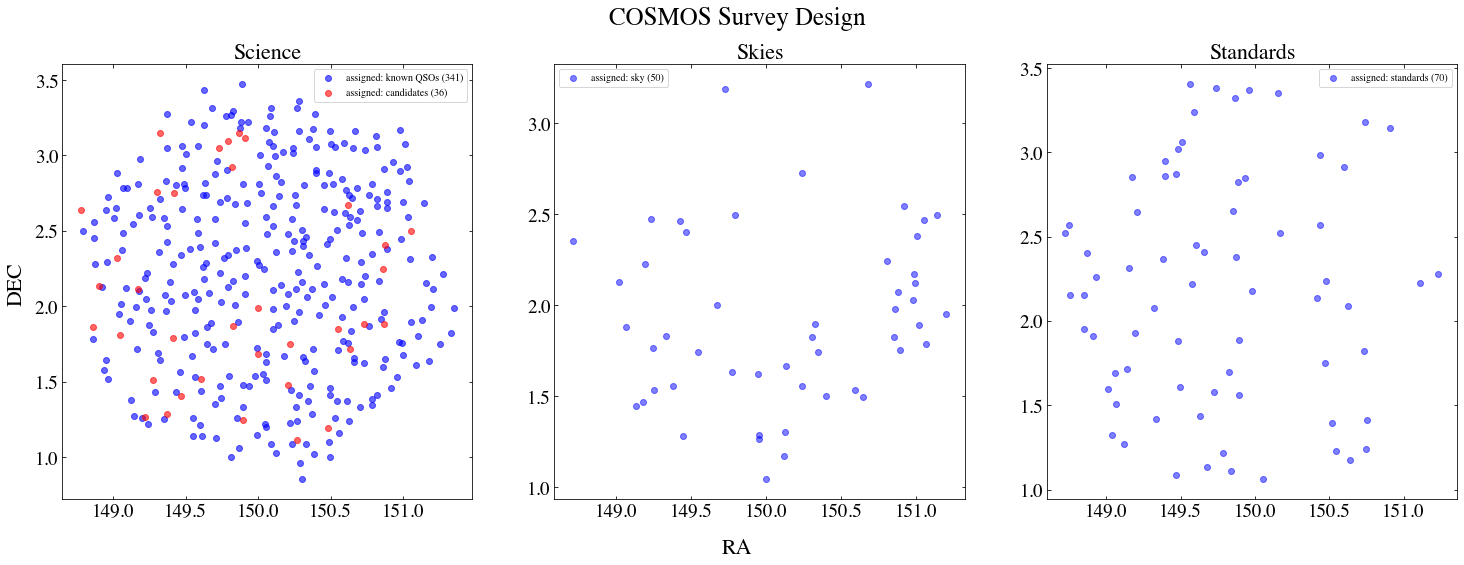

371
371


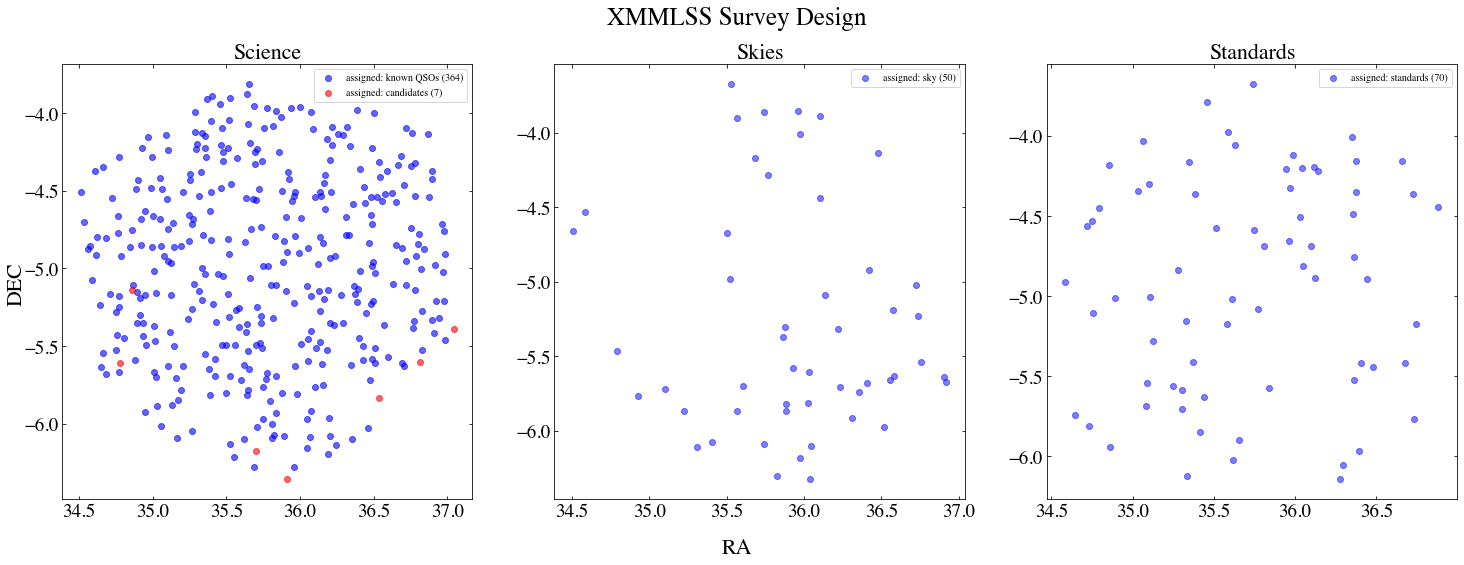

378
378


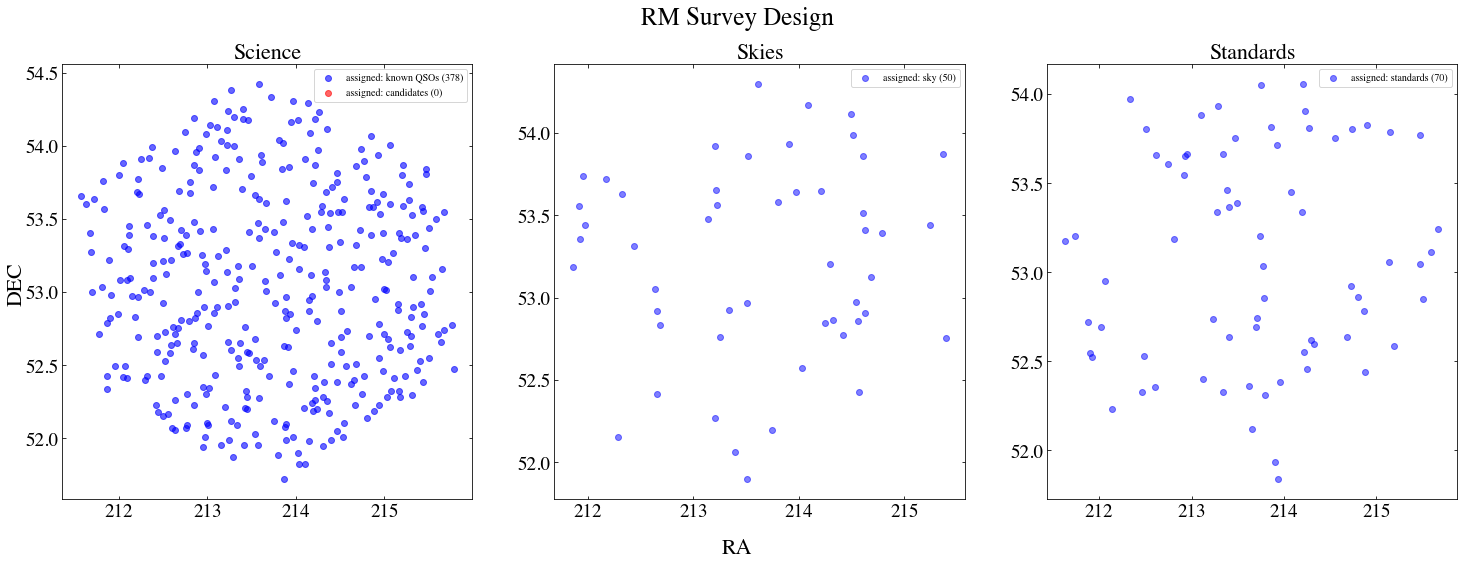

In [5]:
#design plotting
size =20
for i in survey_designs:
    data2 = Table.read(i, hdu = 2, format='fits')
    data1 = Table.read(i, hdu = 1, format='fits')

    assigned_SCIENCEfibers = ((data2['assigned'] == 1) & (data1['category'] == 'science'))
    assigned_CALIBfibers = ((data2['assigned'] == 1) & ((data1['category'] == 'sky_boss') | (data1['category'] == 'standard_boss')))
    assigned_sky = ((data2['assigned'] == 1) & (data1['category'] == 'sky_boss'))
    assigned_standards = ((data2['assigned'] == 1) & (data1['category'] == 'standard_boss'))

    #Carton breakdown
    assigned_known = ((data2['assigned'] == 1) & (data1['carton'] == 'bhm_rm_known_spec'))
    assigned_core = ((data2['assigned'] == 1) & (data1['carton'] == 'bhm_rm_core'))
    assigned_var = ((data2['assigned'] == 1) & (data1['carton'] == 'bhm_rm_var'))
    assigned_ancil = ((data2['assigned'] == 1) & (data1['carton'] == 'bhm_rm_ancillary'))

    ##THRESHOLD BREAKDOWN###
    assigned_QSOs =  ((data1['carton'][assigned_SCIENCEfibers] == 'bhm_rm_known_spec') | (data1['priority'][assigned_SCIENCEfibers] <= 950.))
    print(len(data1["ra"][assigned_SCIENCEfibers][assigned_QSOs])+len(data1["ra"][assigned_SCIENCEfibers][~assigned_QSOs]))
    print(len(data1["ra"][assigned_SCIENCEfibers]))
    #plt.figure(figsize=(10,10))
    fig, axs = plt.subplots(1, 3, figsize=(25, 8))

    axs[0].scatter(data1["ra"][assigned_SCIENCEfibers][assigned_QSOs], data1["dec"][assigned_SCIENCEfibers][assigned_QSOs],
                color = "blue", alpha = 0.6, 
                label="assigned: known QSOs ({})".format(len(data1["ra"][assigned_SCIENCEfibers][assigned_QSOs])))
    axs[0].scatter(data1["ra"][assigned_SCIENCEfibers][~assigned_QSOs], data1["dec"][assigned_SCIENCEfibers][~assigned_QSOs],
                color = "red", alpha = 0.6, 
                label="assigned: candidates ({})".format(len(data1["ra"][assigned_SCIENCEfibers][~assigned_QSOs])))

    axs[1].scatter(data1["ra"][assigned_sky], data1["dec"][assigned_sky],
                color = "blue", alpha = 0.5, 
                label="assigned: sky ({})".format(len(data1["ra"][assigned_sky])))
    axs[2].scatter(data1["ra"][assigned_standards], data1["dec"][assigned_standards],
                color = "blue", alpha = 0.5, 
                label="assigned: standards ({})".format(len(data1["ra"][assigned_standards])))
    axs[0].legend()
    axs[1].legend()
    axs[2].legend()
    axs[0].set_title("Science", fontsize=size+2)
    axs[1].set_title("Skies", fontsize=size+2)
    axs[2].set_title("Standards", fontsize=size+2)

    #axs.set_xlabel('RA', fontsize=size)
    #axs.set_ylabel('Dec', fontsize=size)
    plt.suptitle("{} Survey Design".format(i.split("_")[0]), fontsize=size+5)
    axs[0].tick_params(axis='both', which='major', labelsize=size-1, 
                   top=True, right=True, bottom=True, left=True, direction='in')
    axs[0].tick_params(axis='both', which='minor', labelsize=size-1, 
                   top=True, right=True, bottom=True, left=True, direction='in')
    axs[1].tick_params(axis='both', which='major', labelsize=size-1, 
                   top=True, right=True, bottom=True, left=True, direction='in')
    axs[1].tick_params(axis='both', which='minor', labelsize=size-1, 
                   top=True, right=True, bottom=True, left=True, direction='in')
    axs[2].tick_params(axis='both', which='major', labelsize=size-1, 
                   top=True, right=True, bottom=True, left=True, direction='in')
    axs[2].tick_params(axis='both', which='minor', labelsize=size-1, 
                   top=True, right=True, bottom=True, left=True, direction='in')
    # Set common labels
    fig.text(0.5, 0.04, 'RA', ha='center', va='center', fontsize=size+2)
    fig.text(0.1, 0.5, 'DEC', ha='center', va='center', rotation='vertical', fontsize=size+2)

    plt.savefig("{}_surveydesign_layout.png".format(i.split("_")[0]), facecolor='white',bbox_inches ='tight',dpi=300)

    plt.show()